# **Climate Change Belief Analysis**

## Introduction

Climate change has always been acknowledged by the scientific community as one of the critical issues facing mankind. Many companies are built around the idea of preserving an environmental friendly culture, be it on the products and services they offer or the actual raw material used to extend the structure of their company. One thing that has not been of certain yet is what perception other people have on environmental awareness.

It is of importance to understand public perception of climate change through the use of twitter data. This will allow companies access to a broad base of consumer sentiment thereby increasing their insights for future marketing strategies.

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.iberdrola.com/wcorp/gc/prod/en_US/comunicacion/cambio_climatico_economia_mult_1_res/Cambio_Climatico_Economia_746x419.jpg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

## Problem Statement

There is an excess of information about climate change on social media platforms like Twitter. As such it is difficult for companies to discern the beliefs of people relating to climate change.  Having a robust machine learning model that is able to classify a person's belief in climate change from historical tweet data, as part of companies research toolset will enable them to better gauge their perception of customers relating to their products and services.

## Table of Content

    1. Importing of Libraries
    2  Loading of Dataset
       2.1 General Overview of Dataset
       2.1.1 Data Summary
       2.1.2 Data Types
    3. Data Preprocessing
       3.1 Noise Removal/Text Cleaning
           3.1.1 Tweets Cleaning
           3.1.2 Extraction of Emojis
           3.1.3 Defining Abbreviations
           3.1.4 Contraction Function
           3.1.5 Abbrevation Removal
           3.1.6 Punctuation Removal
           3.1.7 Tokenization
           3.1.8 Lexicon Normalization
           3.1.9 Stemming
           3.1.10 Lemmatization
           3.1.11 Stop Words

    4. Exploratory Data Analysis¶
       4.1 Analysis of Target Variable
       4.2 Duplicate Tweets
       4.3 Most Occuring Words by Sentiment
       4.4 Exploring Tweeter Handles
       4.5 Hashtag Analysis
           4.5.1 Top 10 Common Hashtags Overall
           4.5.2 Plotting Top 20 Hashtags for Negative Sentiments
           4.5.3 Plotting Top 20 Hashtags for Positive Sentiments
           4.5.4 Plotting Top 20 Hashtags for Neutral Sentiments
           4.5.5 Plotting Top 20 Hashtags for News Sentiments
       4.6 Retweets Analysis
       4.7 Emoji Analysis
    5. Feature Enginering
       5.1 Splitting out the X variable from the target
       5.2 Conversion of Tweets Texts to Numerical
       5.3 Class Imbalance
       5.4 Splitting of Training and Validation Sets
    6. Model Building
       6.1 Train Cross Validation
       6.2 Hyperparameter Tuning
       6.3 Creating Pickle File
    7. Submission
    8. Conclusion
    9. References

In [1]:
cd C:/Users/Admin/Anaconda3/Lib/site-packages/en_core_web_lg

C:\Users\Admin\Anaconda3\Lib\site-packages\en_core_web_lg


In [ ]:
!pip install emot --upgrade

In [ ]:
import comet_ml
from comet_ml import Experiment


In [ ]:
#Setting up API Key
#experiment = Experiment(api_key = 'tqGA4GwDac0pGpB0LG33gEjuC', project_name = 'team7-july2020 - Copy', workspace = "kolawole")


# 1. Importing of Libraries

In [282]:
# Packages for data analysis
import pandas as pd
import numpy as np
from time import time

# Packages for visualizations
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud

# Package for model storage
import pickle


# Packages for preprocessing
import nltk
import string
import re
import contractions
import warnings
import emoji
import itertools
import spacy

from textblob import TextBlob
from langdetect import detect
from PIL import Image
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from advertools.emoji import extract_emoji

# Packages for training models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')

warnings.filterwarnings("ignore")


In [109]:
nlp = spacy.load('en_core_web_lg')


In [110]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 2. Loading of Dataset

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

In [402]:
# importing the dataset 
train = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/train.csv')
#train = pd.read_csv('../input/climate-change-edsa2020-21/train.csv')
test = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/test.csv')
#test = pd.read_csv('../input/climate-change-edsa2020-21/test.csv')
sample_submission = pd.read_csv('C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Classification/Predict/sample_submission.csv')


In [403]:
# Creat copy for EDA purposes
train_eda = train.copy()


In [57]:
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
test.head()


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 2.1 General Overview of Dataset

#### Datasets:

* Train dataset: this contains 15,819 tweets and would be used for training our model

* Test dataset: this contains 10,546 tweets and would be used to use our model for prediction.

#### Variables:
* **sentiment**: the sentiment classification of the tweet (int)
* **message**: the tweet text (object)
* **tweetid**: the unique ID of each tweet

The attribute sentiment is dependent variable while the other variables are independent variables. 

The test dataset contains two (2) attributes namely: **message and tweetid**. We would be predicting the sentiment for each tweet.

The tweets sentiments are divided into four (4) classes:

* **[ 2 ] - News:** tweets links to factual news about climate change
* **[ 1 ] - Pro:** tweets that supports the belief of man-made climate change
* **[ 0 ] - Neutral:** tweets that neither support nor refutes the belief of man-made climate change
* **[-1 ] - Anti (Negative):** tweets that does not believe in man-made climate change


In [8]:
train.sentiment.value_counts()


 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

### 2.1.1 Data Summary

Both test and train data sets are complete, there are no missing value.

In [288]:
# Taking general overview at both datasets
print('TRAINING DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(train.shape))
print('Total Number of unique tweets: {}\n'.format(len(set(train['message']))))
print('Total Number of missing values:\n{}\n\n'.format(train.isnull().sum()))
print('TEST DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(test.shape))
print('Total Number of unique tweets: {}\n'.format(len(set(test['message']))))
print('Total Number of missing values:\n{}\n' .format(test.isnull().sum()))


TRAINING DATA

Shape of the dataset: (15819, 8)

Total Number of unique tweets: 13607

Total Number of missing values:
sentiment              0
message                0
tweetid                0
emojis             15638
token                  0
stem                   0
lemma                  0
cleaned_message        0
dtype: int64


TEST DATA

Shape of the dataset: (10546, 4)

Total Number of unique tweets: 9172

Total Number of missing values:
message      0
tweetid      0
token        0
sentiment    0
dtype: int64



## 2.1.2 Data Types

We would take a quick overview of the train and test dataset. The output below shows the shape of the datasets, lists of columns along with their data types and the number of non-null values present in each column.


In [293]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        15819 non-null  int64 
 1   message          15819 non-null  object
 2   tweetid          15819 non-null  int64 
 3   emojis           181 non-null    object
 4   token            15819 non-null  object
 5   stem             15819 non-null  object
 6   lemma            15819 non-null  object
 7   cleaned_message  15819 non-null  object
dtypes: int64(2), object(6)
memory usage: 988.8+ KB


In [296]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    10546 non-null  object
 1   tweetid    10546 non-null  int64 
 2   token      10546 non-null  object
 3   sentiment  10546 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 329.7+ KB


# **3. Data Preprocessing**

Text is the most unstructured form of all the available data. Tweets fall into this category as they are texts. Within texts are various types of noise and these are not readily analyzable without any pre-processing applied on them. In order to gain insights from these data, it is pertinent that we examine and apply proper data cleaning and standardization and making it ready for analysis. This process is called preprocessing.

<br></br>

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRFqLn7H63SxVezmGfi1a5Ok82DMTkli_eA5g&usqp=CAU"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

Before exploration and modelling of our dataset we would be carrying out some preprocessing in order to clean and standardize our dataset for proper insight and analysis.

This entails:

* Noise Removal/Tweet cleaning
* Tokenization
* Lexicon Normalization
* Object Standardization



## **3.1 Noise Removal/Text Cleaning**

We can categorize noise as any piece of text which is not relevant to the context of the data at hand and the expected output.

Removal of tweets with URL's, punctuations, extra white spaces, numbers, mentions, emojis etc is essential before model building. Conversion of tweets to lowercase would also be carried out. English language stopwords (commonly used words of a language – is, am, the, of, in etc) would be removed from the tweets.


### 3.1.1 Tweets Cleaning

In [404]:
def tweets_cleaner(tweets):
    """
    This function uses regular expressions to remove url's, mentions, hashtags,
    punctuation, numbers and any extra white space from tweets after converting
    the tweets to lowercase.

    Input:
    tweets: original tweet
            datatype: string

    Output:
    tweets: modified tweet
            datatype: string
    """
    # Conversion of all tweets to lowercase
    tweets = tweets.lower()
    # Replace of all url's in the tweet
    tweets = re.sub(r'https?:\/\/.*\/\w*', 'website', tweets)
    # Removal of mentions in the tweet
    tweets = re.sub('@[\w]*', 'twitterhandle ', tweets)
    # Removal of numbers in the tweet
    tweets = re.sub(r'\d+', '', tweets)
    # Removal of hashtags in the tweet
    tweets = re.sub(r'#\w*', '', tweets)
    # Removal of the funny diamonds in the tweet
    tweets = re.sub(r"U+FFFD ", ' ', tweets)
    # Removal of extra whitespace in the tweet
    tweets = re.sub(r'\s\s+', ' ', tweets)
    # Removal of space in front/beginning of tweet
    tweets = tweets.strip(' ')
    return tweets


In [406]:
# Application of the function to clean the tweets
train['message'] = train['message'].apply(tweets_cleaner)
test['message'] = test['message'].apply(tweets_cleaner)


In [407]:
train.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt twitterhandle : researchers say we have thr...,698562
3,1,wired : was a pivotal year in the war on clima...,573736
4,1,"rt twitterhandle : it's , and a racist, sexist...",466954


In [16]:
test.head()


,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,putin got to you too jill ! trump doesn't beli...,476263
4,rt : 'female orgasms cause global warming!'\n-...,872928


### 3.1.2 Extraction of Emojis

In [408]:
def extract_all_emojis(tweet):
    """
    This function extracts all emoji's
    existing in a tweet text
    Input:
    tweets: original tweet
           datatype: string

    Output:
    tweets: modified tweet
           datatype: string
    """

    emojis = ''.join(i for i in tweet if i in emoji.UNICODE_EMOJI)
    if emojis:
        return emojis
    return None


In [409]:
# Extracting the emojis
train['emojis'] = train['message'].apply(extract_all_emojis)
train.emojis.fillna(value=np.nan, inplace=True)

train_eda['emojis'] = train_eda['message'].apply(extract_all_emojis)
train_eda.emojis.fillna(value=np.nan, inplace=True)


In [410]:
train_eda[train_eda['emojis'].notnull()].head()


,sentiment,message,tweetid,emojis
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385,😂❄❄🤦♂
121,-1,@TomiLahren kinda funny the professors talk sh...,740194,🤔
209,0,They asked me what my inspiration was- I told ...,797850,😂🔥🌎❄
230,1,RT @AdrianGeoLopez: People still don't believe...,960037,♂
488,1,RT @DomRKing: you're honestly dumb as hell if ...,794085,🙄🙄


In [411]:
def text_emoji(tweet):
    """
    This function accepts tweets column
    and converts emoji's to their text meaning
    Input:
    tweets: original tweet
           datatype: string

    Output:
    tweets: modified tweet
           datatype: string
    """
    emoji_converter = emoji.demojize(tweet, delimiters=("", ""))
    return emoji_converter


In [412]:
# Extracting the emojis on the train dataset
train['message'] = train['message'].apply(text_emoji)
# Extracting the emojis on the test dataset
test['message'] = test['message'].apply(text_emoji)


In [413]:
train[train['emojis'].notnull()].head()


,sentiment,message,tweetid,emojis
56,-1,twitterhandle lmao face_with_tears_of_joy snow...,911385,😂❄❄🤦♂
121,-1,twitterhandle kinda funny the professors talk ...,740194,🤔
209,0,they asked me what my inspiration was- i told ...,797850,😂🔥🌎❄
230,1,rt twitterhandle : people still don't believe ...,960037,♂
488,1,rt twitterhandle : you're honestly dumb as hel...,794085,🙄🙄


### 3.1.3 Defining Abbreviations

In [414]:
# Defining a variable to hold common text
# and social media abbreviations as dictionary
abbreviations = {"aka": "also known as",
                 "btw": "by the way",
                 "b/c": "because",
                 "fyi": "for your information",
                 "idk": "i do not know",
                 "lol": "laughing out loud",
                 "lmao": "laughing my ass off",
                 "lmfao": "laughing",
                 "omg": "oh my god",
                 "otoh": "on the other hand",
                 "wth": "what the hell",
                 "wtf": "what the fuck",
                 "icymi": "in case you missed it",
                 "rofl": "rolling on the floor laughing",
                 "stfu": "shut the fuck up",
                 "nvm": "nevermind",
                 "luv": "love",
                 "luvs": "loves"
                 }


### 3.1.4 Contraction Function

In [415]:
def contraction_converter(tweet):
    """
    This function cleans the tweet data
    by expanding each contraction.
    Arguments:
            tweet: string column containing tweets
    Returns:
            A tweet string of cleaned tweets
    """

    return contractions.fix(tweet)


In [416]:
train['message'] =train['message'].apply(contraction_converter)
test['message'] =test['message'].apply(contraction_converter)


In [127]:
train.head()


,sentiment,message,tweetid,emojis
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN
1,1,it is not like we lack evidence of anthropogen...,126103,NaN
2,2,rt twitterhandle : researchers say we have thr...,698562,NaN
3,1,wired : was a pivotal year in the war on clima...,573736,NaN
4,1,"rt twitterhandle : it is , and a racist, sexis...",466954,NaN


### 3.1.5 Abbrevation Removal

In [417]:
def abbreviation_converter(tweet, abbrev_dict):
    """
    This function cleans the tweet data by
    expanding each common text abbrieviations.
    Arguments:
            tweet: string column containing tweets
            abbreviation_dict: dictionary of text abbreviations to be expanded

    Returns:
            A string of cleaned tweet
    """

    # replace tweet abbreviations with the abbreviation dictionary
    tweet = tweet.replace(abbrev_dict, regex=True)
    return tweet


In [418]:
# Application of the function to clean the tweets
train['message'] = abbreviation_converter(train['message'], abbreviations)
test['message'] = abbreviation_converter(test['message'], abbreviations)


### 3.1.6 Punctuation Removal

In [419]:
def remove_punctuation(tweets):

    """
    This function uses regular expressions to remove
    punctuation from tweets.

    Input:
    tweets: original tweet
           datatype: 'str'

    Output:
    tweets: modified tweet
           datatype: 'str'
    """
    # Removal of punctuation in the tweet
    tweets = ''.join([ch for ch in tweets if ch not in string.punctuation])
    return tweets


In [420]:
# Application of the function to clean the tweets
train['message'] = train['message'].apply(remove_punctuation)
test['message'] = test['message'].apply(remove_punctuation)


In [132]:
train.head()


,sentiment,message,tweetid,emojis
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN
1,1,it is not like we lack evidence of anthropogen...,126103,NaN
2,2,rt twitterhandle researchers say we have thre...,698562,NaN
3,1,wired was a pivotal year in the war on climat...,573736,NaN
4,1,rt twitterhandle it is and a racist sexist c...,466954,NaN


### 3.1.7 Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will be using this tokeniser to clean up the dataset in order to prepare it for analysis.


In [421]:
def tokenize_tweet(tweets):
    """
    This function takes in tweets from the dataframe
    and divides the each tweet into a sequence of tokens

    Input:
    tweets: original tweet
            datatype: string

    Output:
    tokenized_tweet: modified tweet
                     datatype: string
    """
    tokeniser = TreebankWordTokenizer()
    tokenized = tokeniser.tokenize(tweets)
    return tokenized


In [422]:
# Application of the function to tokenize each tweet
train['token'] = train['message'].apply(tokenize_tweet)
test['token'] = test['message'].apply(tokenize_tweet)


In [135]:
train.head()


,sentiment,message,tweetid,emojis,token
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an..."
2,2,rt twitterhandle researchers say we have thre...,698562,NaN,"[rt, twitterhandle, researchers, say, we, have..."
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o..."
4,1,rt twitterhandle it is and a racist sexist c...,466954,NaN,"[rt, twitterhandle, it, is, and, a, racist, se..."


### 3.1.8 Lexicon Normalization

Lexical normalization is the process of transforming non-standard word tokens into their standard forms.

The words “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
Though they mean different but contextually all are similar. The step converts all the disparities of a word into their normalized form (also known as lemma).

Normalization is an important step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature).

The most common lexicon normalization practices are:

**Stemming**:  This is a process of transforming a word to its root word. This uses an algorithm that remove common word-endings from English words (e.g. “ing”, “ed”, “ly”, “es”, “s” etc). A lot of times, the stemmed (root) words might be words that you may not be able to look up in a dictionary. 

**Lemmatization**: This is a process of grouping similar words with similar meaning together. This is a procedure of obtaining the root form of a word, it makes use of vocabulary i.e. the dictionary importance of words, and morphological analysis (word structure and grammar relations). Unlike the stemming process, you can look up a lemma from a dictionary except in few occasions.


### 3.1.9 Stemming

In [423]:
def word_stemmer(tweets):
    """
    This function takes in tweets from the dataframe
    and get the stem (root word) for each tweet

    Input:
    tweets: original tweet
            datatype: string

    Output:
    tokenized_tweet: modified tweet
                     datatype: list
    """
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(word) for word in tweets]


In [424]:
# Applying stemming function to the tokenized tweets
train['stem'] = train['token'].apply(word_stemmer)


In [138]:
train.head()


,sentiment,message,tweetid,emojis,token,stem
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, doe, not, think, ca..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[it, is, not, like, we, lack, evid, of, anthro..."
2,2,rt twitterhandle researchers say we have thre...,698562,NaN,"[rt, twitterhandle, researchers, say, we, have...","[rt, twitterhandl, research, say, we, have, th..."
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o...","[wire, was, a, pivot, year, in, the, war, on, ..."
4,1,rt twitterhandle it is and a racist sexist c...,466954,NaN,"[rt, twitterhandle, it, is, and, a, racist, se...","[rt, twitterhandl, it, is, and, a, racist, sex..."


### 3.1.10 Lemmatization

In [425]:
def word_lemmatizer(tweets):
    """
    This function takes in tweets from the dataframe
    and get the lemma (root word) for each tweet

    Input:
    tweets: original tweet
            datatype: string

    Output:
    tokenized_tweet: modified tweet
                     datatype: list
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tweets]


In [426]:
# Applying the Lemmatization function to each tokenized tweet
train['lemma'] = train['token'].apply(lambda x: word_lemmatizer(x))
test['message'] = test['token'].apply(lambda x: word_lemmatizer(x))


In [141]:
test.head()


,message,tweetid,token
0,"[europe, will, now, be, looking, to, china, to...",169760,"[europe, will, now, be, looking, to, china, to..."
1,"[combine, this, with, the, polling, of, staffe...",35326,"[combine, this, with, the, polling, of, staffe..."
2,"[the, scary, unimpeachable, evidence, that, cl...",224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,"[twitterhandle, twitterhandle, twitterhandle, ...",476263,"[twitterhandle, twitterhandle, twitterhandle, ..."
4,"[rt, twitterhandle, female, orgasm, because, g...",872928,"[rt, twitterhandle, female, orgasms, because, ..."


### 3.1.11 Stop Words

There is a pre-defined stop words list in English. However, we would modify these stop words by appending the retweet words to the stop words list for proper cleaning.


In [427]:
# create a list of stop words
new_stopwords = stopwords.words('english')
# update stop words list
new_stopwords.remove('not')
new_stopwords.extend(['amp'])


In [428]:
def stop_word_removal(tweets):
    """
    This function check for stop words that exists in
    a tweet and remove those stop words.

    Input:
    tweets: original tweet
            datatype: String

    Output:
    noiseless_tweet: modified tweet
                     datatype: string
    """

    # Add tweets words to the stop word dictionary
    stop_word_add = ['rt', 'rts', 'retweet']
    stop_words = set().union(new_stopwords, stop_word_add)
#    stop_words = set().union(stopwords.words('english'), stop_word_add)
    noiseless_words = [word for word in tweets if word not in stop_words]
    # each word is checked against the stop word dictionary and
    # return a list of the words not found in the stopwords list
    noiseless_tweet = " ".join(noiseless_words)  # we join the words together
    return noiseless_tweet  # we return the cleaned tweet


In [429]:
train['cleaned_message'] = train['lemma'].apply(stop_word_removal)
test['message'] = test['message'].apply(stop_word_removal)


In [145]:
train.head()


,sentiment,message,tweetid,emojis,token,stem,lemma,cleaned_message
0,1,polyscimajor epa chief does not think carbon d...,625221,NaN,"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, doe, not, think, ca...","[polyscimajor, epa, chief, doe, not, think, ca...",polyscimajor epa chief doe not think carbon di...
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[it, is, not, like, we, lack, evid, of, anthro...","[it, is, not, like, we, lack, evidence, of, an...",not like lack evidence anthropogenic global wa...
2,2,rt twitterhandle researchers say we have thre...,698562,NaN,"[rt, twitterhandle, researchers, say, we, have...","[rt, twitterhandl, research, say, we, have, th...","[rt, twitterhandle, researcher, say, we, have,...",twitterhandle researcher say three year act cl...
3,1,wired was a pivotal year in the war on climat...,573736,NaN,"[wired, was, a, pivotal, year, in, the, war, o...","[wire, was, a, pivot, year, in, the, war, on, ...","[wired, wa, a, pivotal, year, in, the, war, on...",wired wa pivotal year war climate change website
4,1,rt twitterhandle it is and a racist sexist c...,466954,NaN,"[rt, twitterhandle, it, is, and, a, racist, se...","[rt, twitterhandl, it, is, and, a, racist, sex...","[rt, twitterhandle, it, is, and, a, racist, se...",twitterhandle racist sexist climate change den...


In [146]:
test.head()


,message,tweetid,token
0,europe looking china make sure not alone fight...,169760,"[europe, will, now, be, looking, to, china, to..."
1,combine polling staffer climate change woman r...,35326,"[combine, this, with, the, polling, of, staffe..."
2,scary unimpeachable evidence climate change al...,224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,twitterhandle twitterhandle twitterhandle twit...,476263,"[twitterhandle, twitterhandle, twitterhandle, ..."
4,twitterhandle female orgasm global warming sar...,872928,"[rt, twitterhandle, female, orgasms, because, ..."


# 4. Exploratory Data Analysis

## 4.1 Analysis of Target Variable

These visuals help us see how our target variable (Sentiment) is distributed.


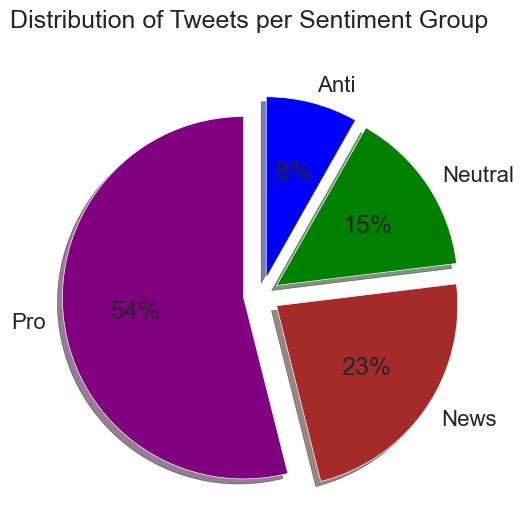

In [430]:
style.use('seaborn-pastel')
colors = ["Purple", "Brown", "Green", "Blue"]
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(ncols=1,
                         nrows=1,
                         figsize=(10, 6),
                         dpi=100)
#sns.countplot(train_eda['sentiment'], ax=axes[0])
labels=['Pro', 'News', 'Neutral', 'Anti']
axes.pie(train_eda['sentiment'].value_counts(),
            autopct='%1.0f%%',
            labels=labels,
            startangle=90,
            explode=(0.1, 0.1, 0.1, 0.1),
            shadow=True
            )
fig.suptitle('Distribution of Tweets per Sentiment Group', fontsize=18)
plt.show()


**Observation**

We observed an imbalance in the distribution of the target variable. The pro-climate change tweets far out-weigh the other sentiment group as it makes up 54% of the whole dataset. This is followed by the News tweets while the Anti-climate change individuals are the least (8%).

An unbalanced dataset can be an issue while modelling, as the model might perform well in classifying the predominant class (Pro-climate change) but perform poorly in classifying the less-occurring class.

This would be addressed during model building.


## 4.2 Duplicate Tweets 

Duplicate tweets are caused by the use of the retweet icon found under a tweet. These tweets being duplicated is not good for our data analysis and therefore we have to remove them. We will remove the duplicate tweets and view how much impact they have on our analysis

In [431]:
# Select all duplicate rows based on the message column
duplicate = train_eda[train_eda.duplicated(['message',
                                            'sentiment'],
                                           keep=False
                                           )
                      ]

# View top 10 duplicate rows
duplicate.head()


,sentiment,message,tweetid,emojis
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,NaN
17,1,RT @patagonia: If our elected leaders fail to ...,490604,NaN
18,1,RT @SenSanders: We have a president-elect who ...,228658,NaN
21,1,RT @World_Wildlife: How climate change impacts...,690605,NaN
35,1,RT @BernieSanders: #ImVotingBecause the future...,817108,NaN


Text(0.5, 1.0, 'Class Distributions for Duplicate tweets')

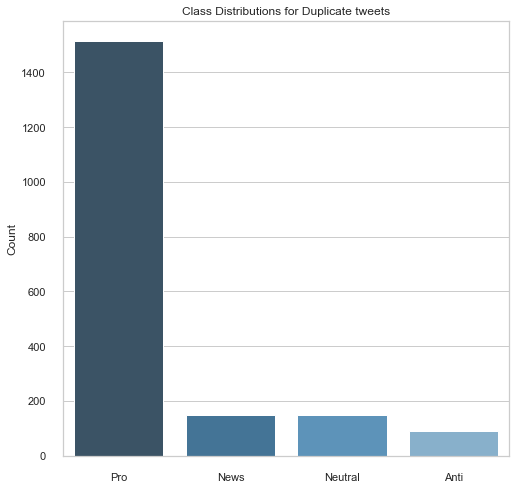

In [432]:
# Create class distribution dataframe for the duplicate tweets
class_dist = pd.DataFrame(list(duplicate['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count']
                          )

# Plot the class distribution
class_dis_figure = plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count,
            palette="Blues_d",)
plt.title('Class Distributions for Duplicate tweets')


## Observations 

From the above visual we can see that from the positive tweets sentiments, we find the most duplicated tweets. This is problematic when it comes to analysis. This means that we have to clean all the duplicated data for a more accurate data analysis.

## 4.3 Most Occuring Words by Sentiment


In [433]:
# Most common words sentiment-wise
Pro = train_eda[train_eda['sentiment'] == 1]
News = train_eda[train_eda['sentiment'] == 2]
Neutral = train_eda[train_eda['sentiment'] == 0]
Anti = train_eda[train_eda['sentiment'] == -1]


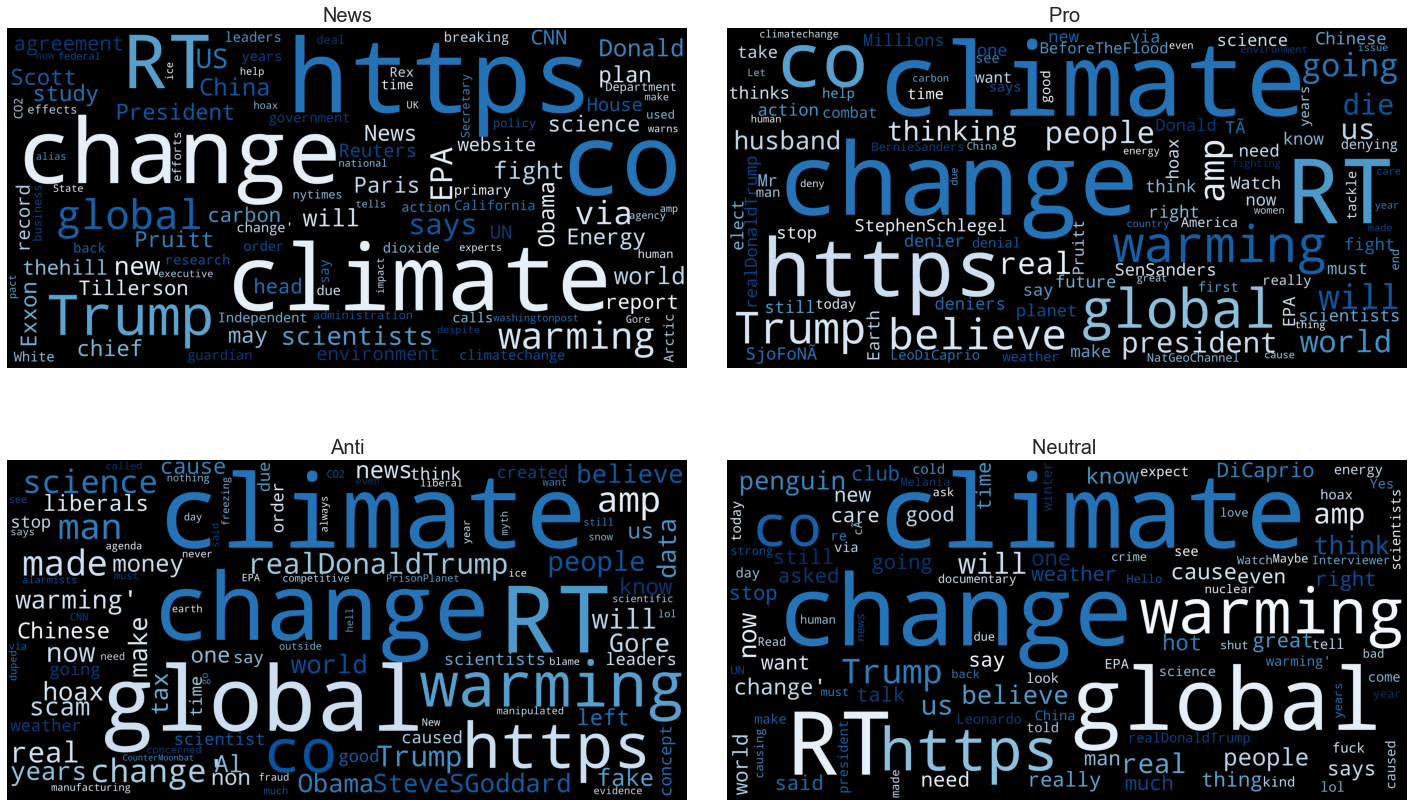

In [434]:
# Extracing rows per sentiment
news = train_eda[train_eda['sentiment'] == 2]['message']
pos = train_eda[train_eda['sentiment'] == 1]['message']
neutral = train_eda[train_eda['sentiment'] == 0]['message']
neg = train_eda[train_eda['sentiment'] == -1]['message']

# Splitting strings into lists
news = [word for line in news for word in line.split()]
pos = [word for line in pos for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
neg = [word for line in neg for word in line.split()]

news = WordCloud(colormap='Blues',
                 background_color='black',
                 max_words=100,
                 max_font_size=60,
                 scale=20,
                 random_state=42,
                 collocations=False,
                 normalize_plurals=False
                 ).generate(' '.join(news))

pos = WordCloud(colormap='Blues',
                background_color='black',
                max_words=100,
                max_font_size=60,
                scale=20,
                random_state=42,
                collocations=False,
                normalize_plurals=False
                ).generate(' '.join(pos))

neutral = WordCloud(colormap='Blues',
                    background_color='black',
                    max_words=100,
                    max_font_size=60,
                    scale=20,
                    random_state=42,
                    collocations=False,
                    normalize_plurals=False
                    ).generate(' '.join(neutral))

neg = WordCloud(colormap='Blues',
                background_color='black',
                max_words=100,
                max_font_size=60,
                scale=20,
                random_state=42,
                collocations=False,
                normalize_plurals=False
                ).generate(' '.join(neg))

# Creating individual wordclouds per sentiment
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.tight_layout(pad=0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News', fontsize=20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pos)
axs[0, 1].set_title('Pro ', fontsize=20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neg)
axs[1, 0].set_title('Anti', fontsize=20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral ', fontsize=20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')


## Observations

This visual helps us analyse which words from different sentiments are the most occuring. This will give the company a better understanding as to what they are dealing with in terms of people's sentiments and therefore be better equipped to deal with the issue at hand. And as we can see the most occuring words are "climate","Donald Trump" and "Global warming".

We can also see in the Anti-climate change tweets, words like Hoax, Scam, Fake, Fraud depicts the characteristics of negativity.

## 4.4 Exploring tweeter handles 

This helps us understand which tweeter handles have a lot of impact on sentiments class.

In [435]:
# Creating a function to extract handles from tweets
def extract_handles(tweet):
    """
    This function finds handles in a
    tweet and returns them as a list

    Input:
    tweets: original tweet
            datatype: String

    Output:
    tweet_handle: extracted handle
                  datatype: string
    """
    handles = []  # declare an empty list
    for i in tweet:  # iterate over the tweet text
        h = re.findall(r'@(\w+)', i)  # check for handles in the tweet text
        handles.append(h)  # append extracted handles to the empty list

    return handles  # return the list of the extracted handles 


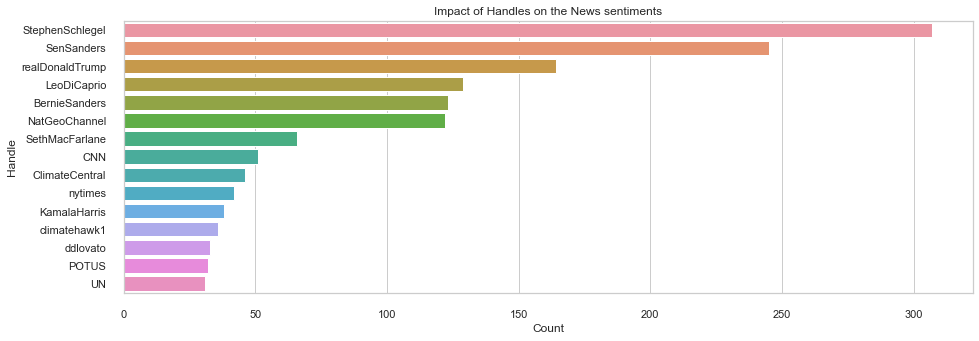

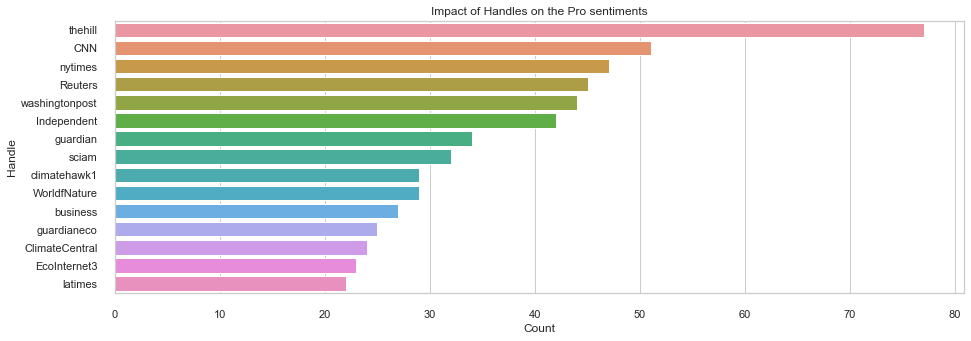

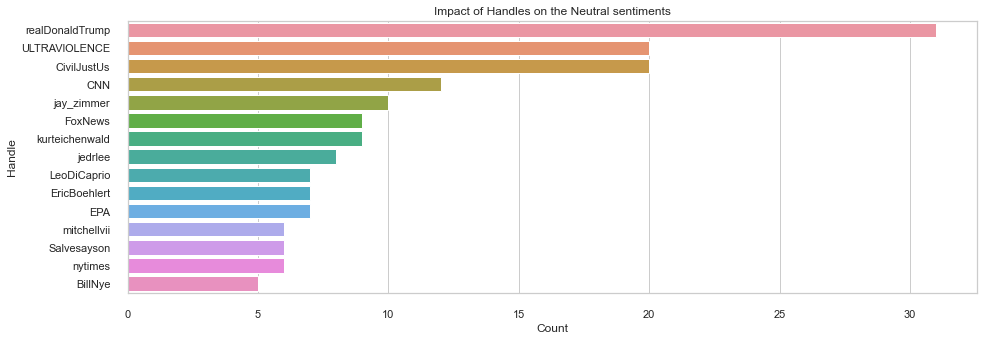

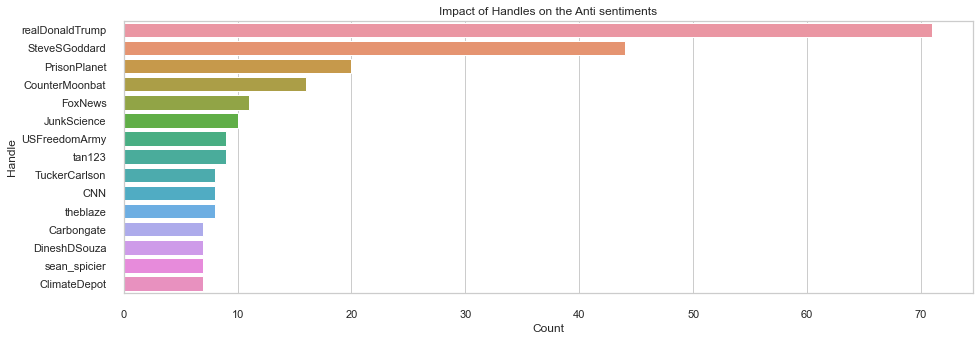

In [436]:
# Extracting handles from tweets
news_handle = extract_handles(train_eda['message']
                              [train_eda['sentiment'] == 1])
pro_handle = extract_handles(train_eda['message']
                             [train_eda['sentiment'] == 2])
neutral_handle = extract_handles(train_eda['message']
                                 [train_eda['sentiment'] == 0])
anti_handle = extract_handles(train_eda['message']
                              [train_eda['sentiment'] == -1])

# Unnesting list
handles = [sum(news_handle, []), sum(pro_handle, []), sum(neutral_handle, []),
           sum(anti_handle, [])]
# Visualising the Handles
full_title = ['Impact of Handles on the News sentiments',
              'Impact of Handles on the Pro sentiments',
              'Impact of Handles on the Neutral sentiments',
              'Impact of Handles on the Anti sentiments']

plt.rcParams['figure.figsize'] = [70, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df_1 = pd.DataFrame({"Handle": list(freq_dist.keys()),
                         'Count': list(freq_dist.values())})

    df_1 = df_1.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df_1, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()


## Observations 

For this visual the focus was on analysing the tweet handles that express the most sentiments. As we can see from all given sentiments type we see that most tweeter handles share sentiments about Donald Trump and this gives the problem statement a more concise focus on the issue at hand.


## 4.5 Hashtag Analysis


Hashtags are used to identify text on Twitter by themes or topics thereby making such posts to be followed by users.


It would be insightful to identify the most frequent hashtags in each class in order to gain a better understanding of what kind of information is being consumed and shared in each class.


In [437]:
def extract_hashtags(tweet):
    """
    This function extracts the different hashtags
    based on the prefix symbol '#' in each tweet.
    Input:
    tweets: original tweet
            datatype: string

    Output:
    tweet_hashtag: extracted hashtag
                   datatype: string
    """
    return [i.lower() for i in tweet.split() if i.startswith('#')]

# Extract each hashtags into a column
train_eda['hashtag'] = train_eda['message'].apply(extract_hashtags)


### **4.5.1 Top 10 Common Hashtags Overall**

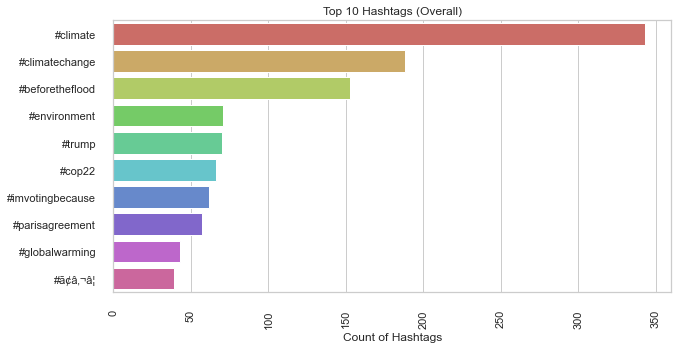

In [438]:
# create  a plot of the 10 Common hashtags overall
all_hashtag = sum(train_eda['hashtag'], [])

# Extract hashtag based on negative sentiment type
tag = nltk.FreqDist(all_hashtag)
# create a dataframe for the count of hashtags
hashtag = pd.DataFrame({'Hashtags': list(tag.keys()),
                        'Count': list(tag.values())})

# Take the top 20 hashtags from the list of hashtags
hashtag = hashtag.nlargest(columns='Count', n=10)
plt.figure(figsize=(10, 5))  # set the chart figure size
# Using the Seaborn package to create a bar chart with
# the key as x-axis and count
ax = sns.barplot(data=hashtag, x='Count', y='Hashtags', palette="hls")
ax.set(ylabel='')  # Define a label for y-axis
plt.title("Top 10 Hashtags (Overall)")  # create a title for the chart
plt.xlabel("Count of Hashtags")  # remove the label for the x-axis
plt.xticks(rotation=90)  # change the X labels rotated to 90 degrees
plt.show()  # display the chart


**Observations**

The most common hashtags are centred around climate change and politics.

#beforetheflood: Reference to Climate Change documentary with Leonardo DiCaprio

#cop22: Reference to 2016 United Nations Climate Change Conference

#parisagreement: Reference to the Paris Agreement within the United Nations Framework Convention on Climate Change signed in 2016.

In [374]:
len(all_hashtag)

4124

In [439]:
# Extract hashtags based on each sentiment type
hashtag_neg = sum(train_eda[train_eda['sentiment'] == -1]['hashtag'], [])
hashtag_neutral = sum(train_eda[train_eda['sentiment'] == 0]['hashtag'], [])
hashtag_pos = sum(train_eda[train_eda['sentiment'] == 1]['hashtag'], [])
hashtag_news = sum(train_eda[train_eda['sentiment'] == 2]['hashtag'], [])


In [335]:
train_eda.head()

,sentiment,message,tweetid,hashtag
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[]
1,1,It's not like we lack evidence of anthropogeni...,126103,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]


### **4.5.2 Plotting Top 20 Hashtags for Negative Sentiments**



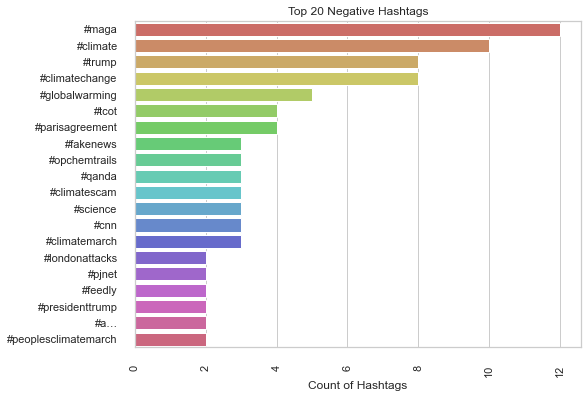

In [440]:
# Extract hashtag based on negative sentiment type
tag = nltk.FreqDist(hashtag_neg)
# create a dataframe for the count of hashtags
hashtag = pd.DataFrame({'Negative': list(tag.keys()),
                        'Count': list(tag.values())})

# Take the top 20 hashtags from the list of hashtags
hashtag = hashtag.nlargest(columns='Count', n=20)
plt.figure(figsize=(8, 6))  # set the chart figure size
# Using the Seaborn package to create a bar chart with
# the key as x-axis and count
ax = sns.barplot(data=hashtag, x='Count', y='Negative', palette="hls")
ax.set(ylabel='')  # remove the label for the y-axis
plt.title("Top 20 Negative Hashtags")  # create a title for the chart
plt.xlabel("Count of Hashtags")  # Define a label for x-axis
plt.xticks(rotation=90)  # change the X labels rotated to 90 degrees
plt.show()  # display the chart


**Observation**

* It is interesting to see that Maga and Trump are the most occurring hashtags used in the anti-climate change tweets. It is of note that MAGA (Make America Great Again) was Trump's slogan during the 2016 election campaign in America, which shows support for Trump. So, most of the anti-climate tweets were from Trump supporters.
* TCOT (Top Conservative On Twitter) also rank high among anti-climate hashtags. It is well known that Republicans are the Conservatives, so we can infer that most of the anti-climate tweets shows support for Trump and the party. 
* Most of the anti-climate change hashtag tweets are majorly political

### **4.5.3 Plotting Top 20 Hashtags for Positive Sentiments**

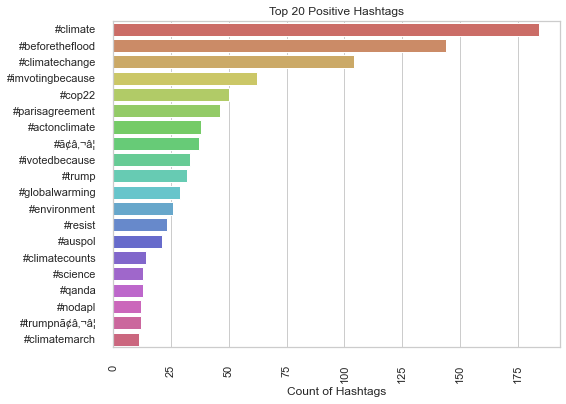

In [441]:
# Extract hashtags based on positive sentiment type
tag = nltk.FreqDist(hashtag_pos)
# create a dataframe for the count of hashtags
hashtag = pd.DataFrame({'Positive': list(tag.keys()),
                        'Count': list(tag.values())})
# Take the top 20 hashtags from the list of hashtags
hashtag = hashtag.nlargest(columns="Count", n=20)

plt.figure(figsize=(8, 6))  # set the chart figure size
# Using the Seaborn package to create a bar chart with
# the key as x-axis and count as y-axis
ax = sns.barplot(data=hashtag, x="Count", y="Positive", palette="hls")
ax.set(ylabel='')  # remove the label for the y-axis
plt.title("Top 20 Positive Hashtags")  # create a title for the chart
plt.xlabel('Count of Hashtags')  # Define a label for x-axis
plt.xticks(rotation=90)  # change the X labels rotated to 90 degrees
plt.show()  # display the chart


***Observation***

* 'BeforeTheFlood' ranked the most popular hashtags among the pro-climate change tweets. This we can trace to the documentary where discussions on the dangers of climate change and any possible solutions.

* ImVotingBecause and IVotedBecause hashtags in pro climate change tweets. These are likely political tweets.

* The 5th and 6th hashtags are COP22 and ParisAgreement.

### **4.5.4 Plotting Top 20 Hashtags for Neutral Sentiments**

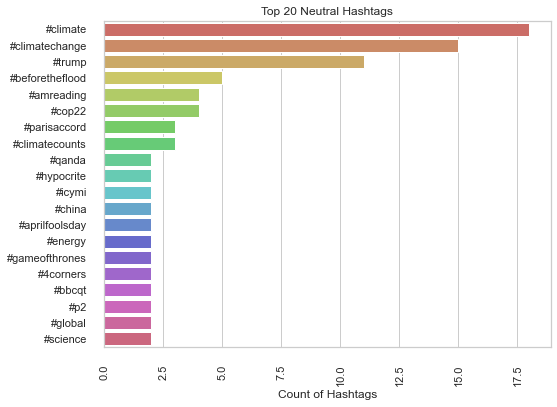

In [442]:
# Extract hashtag based on neutral sentiment type
tag = nltk.FreqDist(hashtag_neutral)
# create a dataframe for the count of hashtags
hashtag = pd.DataFrame({'Neutral': list(tag.keys()),
                        'Count': list(tag.values())})

# Take the top 20 hashtags from the list of hashtags
hashtag = hashtag.nlargest(columns="Count", n=20)
plt.figure(figsize=(8, 6))  # set the chart figure size
# Using the Seaborn package to create a bar chart with
# the key as x-axis and count
ax = sns.barplot(data=hashtag, x="Count", y="Neutral", palette="hls")
ax.set(ylabel='')  # remove the label for the y-axis
plt.title("Top 20 Neutral Hashtags")  # create a title for the chart
plt.xlabel("Count of Hashtags")  # Define a label for x-axis
plt.xticks(rotation=90)  # change the X labels rotated to 90 degrees
plt.show()  # display the chart


### **4.5.5 Plotting Top 20 Hashtags for News Sentiments**

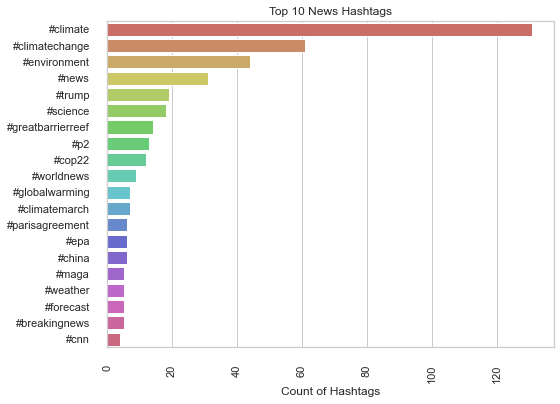

In [443]:
# Extract hashtag based on news sentiment type
tag = nltk.FreqDist(hashtag_news)
# create a dataframe for the count of hashtags
hashtag = pd.DataFrame({'News': list(tag.keys()),
                        'Count': list(tag.values())})

# Take the top 20 hashtags from the list of hashtags
hashtag = hashtag.nlargest(columns="Count", n=20)
plt.figure(figsize=(8, 6))  # set the chart figure size
# Using the Seaborn package to create a bar chart with
# the key as x-axis and count
ax = sns.barplot(data=hashtag, x="Count", y="News", palette="hls")
ax.set(ylabel='')  # remove the label for the y-axis
plt.title("Top 20 News Hashtags")  # create a title for the chart
plt.xlabel("Count of Hashtags")  # Define a label for x-axis
plt.xticks(rotation=90)  # change the X labels rotated to 90 degrees
plt.show()  # display the chart


 ## Observations 
    
For the top 10 most used hashtags , which makes it easy for company to see under what topic people share the most sentiments , we can see that for all different sentiment class , the most used hashtag is 'climate' and knowing that will make it easy to deal with the problem at hand

## 4.6 Retweets Analysis

Retweet is the re-posting of a tweet which helps in quickly sharing a tweet with all followers.

We would analyze retweet distribution among the different sentiment classes in the dataset.


In [444]:
def check_retweet(tweet):
    """
    This function checks if a tweet
    contains a re-tweet

    Input:
    tweets: original tweet
            datatype: String

    Output:
    retweet:
        datatype: integer
    """
    # searching for retweet pattern by using a regular expression
    rtwt = re.search(r'^\s?RT\s@[a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14}[\s:]', tweet)
    if rtwt:  # checking if tweet is a retweet
        return 1  # output 1 if tweet is a retweet
    return 0  # output 0 if tweet is a retweet


In [469]:
# Extracting the retweets
train_eda['retweets'] = train_eda['message'].apply(check_retweet)


In [470]:
# Determining number of rows which are retweets
retweets_count = train_eda['retweets'].value_counts()
retweets_df = pd.DataFrame({'Retweet':retweets_count.index, 'Count':retweets_count.values})

# Checking the percentage of retweets
perc_retweet = round(train_eda['retweets'].value_counts(normalize=True)*100,2)
perc_retweet_df = pd.DataFrame({'Retweet':perc_retweet.index, 
                                 'Percentage':perc_retweet.values})

# Joining the rows and percentage
retweet_df = pd.merge(retweets_df, perc_retweet_df, on='Retweet', how='outer')
retweet_df.set_index('Retweet', inplace=True)
retweet_df.sort_index(axis = 0)


,Count,Percentage
Retweet,,
0,6213,39.28
1,9606,60.72


In [475]:
print(train_eda.sentiment.value_counts())
tweets_counts = list(train_eda.sentiment.value_counts())

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


In [488]:
# calculate retweet count
print((train_eda[train_eda.message.str.contains('RT')]).sentiment.value_counts())
retweets_counts = list((train_eda[train_eda.message.str.contains('RT')])
                     .sentiment.value_counts())

 1    5770
 2    2139
 0    1087
-1     690
Name: sentiment, dtype: int64


**Observation**

Over 60% of the train datasets are made up of retweets. 


In [490]:
# creating a dataframe of count of tweets and count of retweets
sentiment_classes = ['Pro', 'News', 'Neutral', 'Anti']
tweets_df = pd.DataFrame({'Sentiment class': sentiment_classes,
                          'Count': tweets_counts})
retweets_df = pd.DataFrame({'Sentiment class': sentiment_classes,
                            'Count': retweets_counts})
combined_count = pd.concat([tweets_df, retweets_df],
                           keys=['count of tweets',
                                 'count of retweets'])
combined_count.reset_index(inplace=True)
combined_count.columns = combined_count.columns.str.replace('level_0', 'Type')

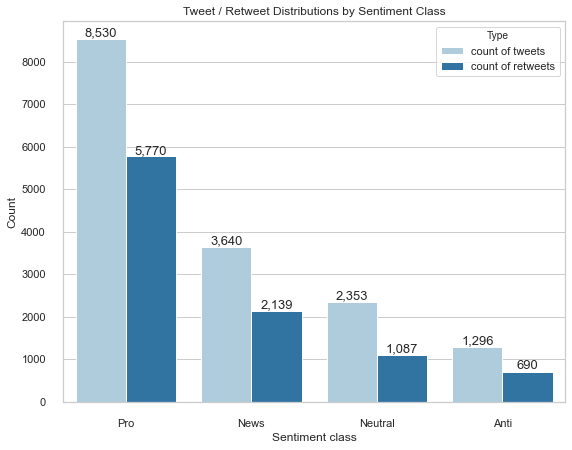

In [491]:
plt.figure(figsize=(9, 7))
ax = sns.barplot(x='Sentiment class', y='Count', data=combined_count,
                 palette="Paired", hue='Type')
plt.title('Tweet / Retweet Distributions by Sentiment Class');
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(format(y, ',.0f'), (x.mean(), y), fontsize=13,
                ha='center', va='bottom') # set the alignment of the text


**Observation**

It is observed that the total number of tweets that contain retweets is 9,686 (i.e. approximately 61% of the train dataset).
The Pro-climate change tweets has the highest number of Retweets. Almost 67% of Pro tweets comprises of Retweets. This implies that a tweet is retweeted several times, this brings down the uniqueness. This high number of Retweets is noticable in other sentiment classes.


## 4.7 Emoji Analysis

In [516]:
emoji_df = train_eda[train_eda['emojis'].notnull()]
emoji = list(itertools.chain(*emoji_df['emojis'].values))
freq = nltk.FreqDist(emoji)
freq.most_common(n=20)


[('😂', 28),
 ('™', 13),
 ('🤔', 11),
 ('🙄', 11),
 ('❤', 11),
 ('🔥', 10),
 ('❄', 8),
 ('🤣', 8),
 ('🌍', 7),
 ('➡', 7),
 ('🌎', 6),
 ('🇺', 6),
 ('🇸', 6),
 ('☀', 6),
 ('😳', 5),
 ('🏽', 5),
 ('💀', 5),
 ('▶', 5),
 ('🙃', 4),
 ('⚡', 4)]

**Observations**

The most common emoji is the 'Face with Tears of Joy', which is a common emoji between 2014-2018. It is an expression of funny, sarcasm or humour present in the tweet texts.

Occurring often also are the 'Thinking Face' emoji which represents thinking or questioning belief and the Fire and Snowflake emoji which we can say expresses the extreme impacts of global warming climate change.

The Skull emoji commonly represents figurative death which we can attribute to the impact of climate change on humanity.

# 5. Feature Engineering
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://mlwhiz.com/images/countvectorizer.png"
     style="float: center; padding-bottom=0.5em"
     width=500px/>
</div>


## 5.1 Splitting out the X variable from the target

We are splitting the **'sentiment'** column, which represents the dependent variable (y) and the newly created feature, **'cleaned_message'**, which represents the independent variable.

In [517]:
y = train['sentiment'].values
X = train['cleaned_message'].values


## 5.2 Conversion of Tweets Texts to Numerical

We applied vectorisation to the tweet dataset. This is a process of converting texts into numerical features.

The method, TfidfVectorizer, was used for this process as it provides a means of prioritising less frequent tokens and penalising those that appear in almost all of the tweets.

In [573]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5,
# stop_words="english")
vectorizer = TfidfVectorizer(sublinear_tf=True,
                             smooth_idf=True,
                             max_df=0.3,
                            # min_df=1,
                             strip_accents='ascii',
                             ngram_range=(1, 2))
X_vectorized = vectorizer.fit_transform(X)


In [574]:
print('Shape of the vectorised data: {}'.format(X_vectorized.shape))


Shape of the vectorised data: (15819, 86657)


In [575]:
testx = test['message']
test_vect = vectorizer.transform(testx.values)
test_vect.data


array([0.41863361, 0.29556811, 0.1157197 , ..., 0.25263805, 0.30494853,
       0.31296725])

## 5.3 Class Imbalance

Balancing is required to address the issue of data imbalance noticed in our dataset. This is necessary so that all classes are weighted evenly so as to improve the model performance.

We would be applying the Synthetic Minority Oversampling Technique (SMOTE) to correct this imbalance. This technique entails creating 'synthetic' samples from the minority class.

In [545]:
# initializing a variable to the desired SMOTE
smote = SMOTE(random_state=2)#sampling_strategy='minority')

# fit SMOTE to training dataset
X_smote, y_smote = smote.fit_resample(X_vectorized, y)


In [166]:
X_smote.shape


(34120, 86657)

In [167]:
y_smote.shape


(34120,)

## 5.4 Splitting of Training and Validation Sets

Training Data: This is the dataset that contains the known labels. The model is trained on this data to be able to generalize unlabeled data.

Validation Data: This is a subset of the training data that is used to assess how well the algorithm was trained on the training data.

Test data: This is the dataset that is used to provide an unbiased evaluation of the final model fit on the training dataset.

In [576]:
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y,
                                                  #X_smote,y_smote,
                                                  test_size=.1,
                                                  random_state=42
                                                  )


# 6. Model Building

## 6.1 Train Cross Validation

In [577]:
# Carrying out cross-validation and checking F1 score for different classifiers
random_state = 42
kf = KFold(n_splits=10,
           random_state=random_state,
           shuffle=True)  # Define number of KFolds

clf = [LogisticRegression(max_iter=4000),
       LinearSVC(random_state=random_state),
       ComplementNB()]

scores = []
for i in range(len(clf)):
    scores.append(cross_val_score(clf[i], X_train, y_train,
                                  scoring=make_scorer(f1_score,
                                                      average='macro'),
                                  cv=kf).mean()
                  )

output_df = pd.DataFrame({'List of Algorithm': ['LR', 'LSVC', 'CNB'],
                          'F1_Macro_Scores': scores})
output = output_df.sort_values('F1_Macro_Scores', ascending=False)

print(output)


  List of Algorithm  F1_Macro_Scores
1              LSVC         0.623672
2               CNB         0.600613
0                LR         0.541849


### 6.1.1 Linear Support Vector Classifier

In [578]:
# Compare results of best performing versus worst performing model
# Best performing model: LinearSVC()
clf = LinearSVC(random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print('Getting the Best Model Performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')))
print('\n' + classification_report(y_val, y_pred))


Getting the Best Model Performance

Accuracy: 0.7395701643489254
Precision: 0.730117404168845
Recall: 0.5889628771594398
F1: 0.6298660312533849

              precision    recall  f1-score   support

          -1       0.75      0.40      0.52       126
           0       0.68      0.34      0.45       224
           1       0.74      0.89      0.81       895
           2       0.75      0.73      0.74       337

    accuracy                           0.74      1582
   macro avg       0.73      0.59      0.63      1582
weighted avg       0.74      0.74      0.72      1582



### 6.1.2 Complement Naive Bayes

In [ ]:
# Complement Naive Bayes
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_val)

print('Getting the Best Model Performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')))
print('\n' + classification_report(y_val, y_pred))


### 6.1.3 K-Nearest Neighbour

In [579]:
# Compare results of best performing versus worst performing model
# Worst performing model:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print('Worst model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')))
print('\n' + classification_report(y_val, y_pred))


Worst model performance

Accuracy: 0.34323640960809104
Precision: 0.5773449406605273
Recall: 0.3537475818010398
F1: 0.2812086858620235

              precision    recall  f1-score   support

          -1       0.87      0.16      0.27       126
           0       0.21      0.09      0.13       224
           1       0.97      0.20      0.33       895
           2       0.25      0.97      0.40       337

    accuracy                           0.34      1582
   macro avg       0.58      0.35      0.28      1582
weighted avg       0.70      0.34      0.31      1582



## 6.2 Hyperparameter Tuning

Hyperparameter tuning was performed on the two best performing models from the cross-validation. These are the LinearSVC and ComplementNB, both of which are known to perform well with unbalanced classes which is a feature of the current dataset.

Hyperparameter tuning provides a means for identifying the set of optimal hyperparameters for a learning algorithm. We evaluated the C and multi_class parameter for the LinearSVC and alpha for the ComplementNaiveBayes. C represents the regularization parameter that controls the trade off between achieving a low training error and a low testing error. Alpha is the smoothening or regularization parameter in Naive Bayes.

In [586]:
# Specify the range of 'C' parameters for LinearSVC
params = {'C': [0.1, 0.5, 1, 5, 10]}

# Setting the GridSearch for the best parameters
clf = GridSearchCV(LinearSVC(max_iter=4000, multi_class='ovr'),
                   param_grid=params, cv=kf,
                   scoring=make_scorer(f1_score, average='macro'))

# Fit the gridsearch on the dataset
clf = clf.fit(X_train, y_train)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))


Best score: 0.6207537901843097
Best parameters: {'C': 5}


In [587]:
svc = LinearSVC(random_state=random_state,
                C=clf.best_params_['C'])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)

svc_tuned = LinearSVC(random_state=random_state)
svc_tuned.fit(X_train, y_train)
y_pred_tuned = svc_tuned.predict(X_val)

print('LinearSVC model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)) +
      '  >>>  {}'.format(accuracy_score(y_val, y_pred_tuned)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(precision_score(y_val, y_pred_tuned,
                                         average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(recall_score(y_val, y_pred_tuned, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(f1_score(y_val, y_pred_tuned, average='macro')))
print('\n' + classification_report(y_val, y_pred))
print('\n' + classification_report(y_val, y_pred_tuned) + '\n')


LinearSVC model performance

Accuracy: 0.7370417193426043  >>>  0.7395701643489254
Precision: 0.6931952399263972  >>>  0.730117404168845
Recall: 0.6051783562345194  >>>  0.5889628771594398
F1: 0.6340719176669973  >>>  0.6298660312533849

              precision    recall  f1-score   support

          -1       0.68      0.44      0.53       126
           0       0.60      0.36      0.45       224
           1       0.76      0.87      0.81       895
           2       0.73      0.76      0.74       337

    accuracy                           0.74      1582
   macro avg       0.69      0.61      0.63      1582
weighted avg       0.73      0.74      0.72      1582


              precision    recall  f1-score   support

          -1       0.75      0.40      0.52       126
           0       0.68      0.34      0.45       224
           1       0.74      0.89      0.81       895
           2       0.75      0.73      0.74       337

    accuracy                           0.74      1582


In [589]:
# Specify the range of alpha parameters for ComplementNB
params = {'alpha': [0.1, 0.5, 1],
          'norm': [True, False]}

clf2 = GridSearchCV(ComplementNB(),
                    param_grid=params,
                    cv=kf,
                    scoring=make_scorer(f1_score,
                                        average='macro'))
# Fit the gridsearch on the dataset
clf2 = clf2.fit(X_train, y_train)

print('Best score: {}'.format(clf2.best_score_))
print('Best parameters: {}'.format(clf2.best_params_))


Best score: 0.6019203546274758
Best parameters: {'alpha': 0.5, 'norm': True}


In [590]:
cnb = ComplementNB(alpha=clf2.best_params_['alpha'],
                   norm=clf2.best_params_['norm'])
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_val)

cnb_tuned = ComplementNB()
cnb_tuned.fit(X_train, y_train)
y_pred_tuned = cnb_tuned.predict(X_val)

print('ComplementNB model performance' + '\n')
print('Accuracy: {}'.format(accuracy_score(y_val, y_pred)) +
      '  >>>  {}'.format(accuracy_score(y_val, y_pred_tuned)))
print('Precision: {}'.format(precision_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(precision_score(y_val, y_pred_tuned,
                                         average='macro')))
print('Recall: {}'.format(recall_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(recall_score(y_val, y_pred_tuned, average='macro')))
print('F1: {}'.format(f1_score(y_val, y_pred, average='macro')) +
      '  >>>  {}'.format(f1_score(y_val, y_pred_tuned, average='macro')))
print('\n' + classification_report(y_val, y_pred))
print('\n' + classification_report(y_val, y_pred_tuned) + '\n')


ComplementNB model performance

Accuracy: 0.7079646017699115  >>>  0.7048040455120101
Precision: 0.6335882662616092  >>>  0.6176966575924664
Recall: 0.5924646451878498  >>>  0.6051005961064366
F1: 0.5952834263475757  >>>  0.6021902474519698

              precision    recall  f1-score   support

          -1       0.47      0.48      0.47       126
           0       0.64      0.29      0.40       224
           1       0.77      0.82      0.79       895
           2       0.65      0.78      0.71       337

    accuracy                           0.71      1582
   macro avg       0.63      0.59      0.60      1582
weighted avg       0.70      0.71      0.70      1582


              precision    recall  f1-score   support

          -1       0.46      0.50      0.48       126
           0       0.57      0.33      0.42       224
           1       0.78      0.79      0.79       895
           2       0.66      0.79      0.72       337

    accuracy                           0.70      1

In [591]:
# Running a prediction on the test data
classifier = LinearSVC(max_iter=4000)
linearsvc = classifier.fit(X_vectorized, y)
y_pred = linearsvc.predict(test_vect)

In [592]:
test['sentiment'] = y_pred


## 6.3 Creating Pickle File

In [180]:
import pickle
model_save_path = "team7_vectorizer.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(vectorizer, file)


In [ ]:
import pickle
model_save_path = "team7_linear_svc_model.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(linearsvc, file)


# 7. Submission

In [593]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)


# 8. Conclusion

# 9. References

1. https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/ ...SHIVAM BANSAL

